In [93]:
#importing the require libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [94]:
#reading the data
data = pd.read_csv("train.csv")

In [95]:
data.shape

(891, 12)

In [96]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [97]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [98]:
#assigning the passengerid as index
data = data.set_index('PassengerId')

In [99]:
#statistical analysis of data
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [101]:
#checking for null values
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [102]:
#the number of non distinct values
data.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [103]:
#percentage of survival rate 
#0-not survived
#1-survived
data["Survived"].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [104]:
data["Age"].mode()

0    24.0
Name: Age, dtype: float64

In [105]:
data["Age"].mean()

29.69911764705882

In [106]:
data["Age"] = data["Age"].fillna(29.69)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

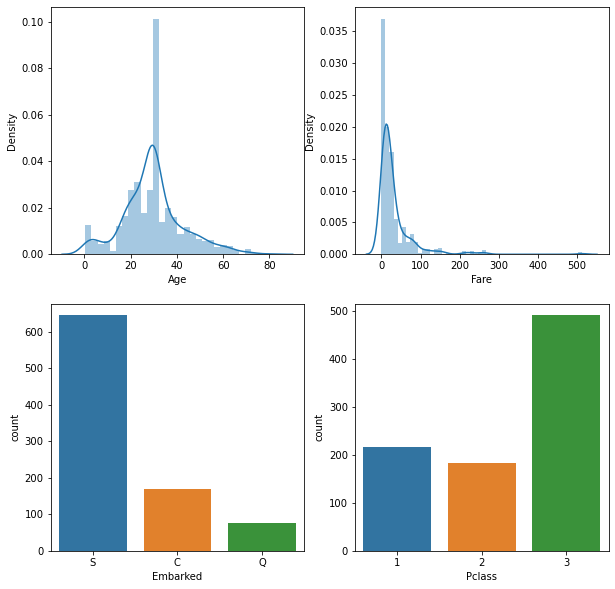

In [107]:
fig,([ax1,ax2],[ax3,ax4]) = plt.subplots(2,2,figsize=(10,10))

sns.distplot(data["Age"],ax=ax1)
sns.distplot(data['Fare'],ax=ax2)
sns.countplot(data['Embarked'],ax=ax3)
sns.countplot(data["Pclass"],ax=ax4)



**Age follows a near normal distribution while Fare is right skewed**

In [108]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

**Cabin has large number of missing values from the available dataset , also it denotes distinct cabin numbers hence we can drop it**

In [109]:
data.drop('Cabin',inplace=True,axis =1)

In [110]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [111]:
#imputing the missing values of embarked with mode
a = data["Embarked"].mode().iloc[0]
a

'S'

In [112]:
data["Embarked"] = data["Embarked"].fillna(a)

In [113]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [114]:
data.drop(["Name","Ticket","SibSp","Parch"],axis = 1 ,inplace = True)

In [115]:
data1 = pd.get_dummies(data)

In [116]:
data1

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,22.00,7.2500,0,1,0,0,1
2,1,1,38.00,71.2833,1,0,1,0,0
3,1,3,26.00,7.9250,1,0,0,0,1
4,1,1,35.00,53.1000,1,0,0,0,1
5,0,3,35.00,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
887,0,2,27.00,13.0000,0,1,0,0,1
888,1,1,19.00,30.0000,1,0,0,0,1
889,0,3,29.69,23.4500,1,0,0,0,1


In [117]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [118]:
data1.corr()

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.069783,0.257307,0.543351,-0.543351,0.168240,0.003650,-0.149683
Pclass,-0.338481,1.000000,-0.331387,-0.549500,-0.131900,0.131900,-0.243292,0.221009,0.074053
Age,-0.069783,-0.331387,1.000000,0.091594,-0.084138,0.084138,0.032015,-0.013950,-0.019268
Fare,0.257307,-0.549500,0.091594,1.000000,0.182333,-0.182333,0.269335,-0.117216,-0.162184
Sex_female,0.543351,-0.131900,-0.084138,0.182333,1.000000,-1.000000,0.082853,0.074115,-0.119224
Sex_male,-0.543351,0.131900,0.084138,-0.182333,-1.000000,1.000000,-0.082853,-0.074115,0.119224
Embarked_C,0.168240,-0.243292,0.032015,0.269335,0.082853,-0.082853,1.000000,-0.148258,-0.782742
Embarked_Q,0.003650,0.221009,-0.013950,-0.117216,0.074115,-0.074115,-0.148258,1.000000,-0.499421
Embarked_S,-0.149683,0.074053,-0.019268,-0.162184,-0.119224,0.119224,-0.782742,-0.499421,1.000000


In [119]:
target = data['Survived']

In [120]:
target.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [121]:
features= data1.drop(['Survived'],axis=1)

In [122]:
from sklearn.preprocessing import StandardScaler 

In [123]:
scalar = StandardScaler()

In [124]:
features_scaled = scalar.fit_transform(features)

In [180]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,log_loss,precision_recall_curve,precision_score,accuracy_score,recall_score,roc_curve

In [126]:
from sklearn.model_selection import train_test_split as tts

In [127]:
X_train, X_test,y_train, y_test = tts(features_scaled, target, test_size =0.2,random_state = 42)

In [128]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,log_loss,precision_recall_curve,precision_score,accuracy_score,recall_score,roc_auc_score

In [129]:
lr = LogisticRegression()

In [131]:
lr.fit(X_train,y_train)

LogisticRegression()

In [132]:
prediction = lr.predict(X_test)

In [199]:
predtprob = lr.predict_proba(X_test)
#print(predtprob)

In [134]:
f1_score(y_pred=prediction,y_true=y_test)

0.7534246575342465

In [135]:
accuracy_score(y_pred=prediction,y_true=y_test)

0.7988826815642458

In [136]:
confusion_matrix(y_test,prediction)

array([[88, 17],
       [19, 55]], dtype=int64)

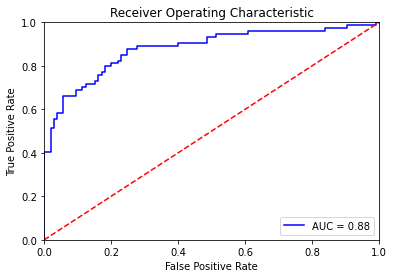

In [137]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
preds = predtprob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
#print(fpr,tpr,threshold)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [138]:
precision_score(y_test,prediction)

0.7638888888888888

In [139]:
recall_score(y_test,prediction)

0.7432432432432432

## SVM ##

In [168]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [185]:
svm_clf = SVC(kernel="poly",degree=3,C=5,coef0=1,probability=True)
svm_clf.fit(X_train,y_train)

SVC(C=5, coef0=1, kernel='poly', probability=True)

In [197]:
svm_predt = svm_clf.predict(X_test)
svm_proba = svm_clf.predict_proba(X_test)
#print(svm_proba)

In [187]:
precision_score(y_test,svm_predt)

0.8305084745762712

In [188]:
recall_score(y_test,svm_predt)

0.6621621621621622

In [189]:
f1_score(y_pred=svm_predt,y_true=y_test)

0.7368421052631579

In [190]:
accuracy_score(y_pred=svm_predt,y_true=y_test)

0.8044692737430168

In [191]:
confusion_matrix(y_test,svm_predt)

array([[95, 10],
       [25, 49]], dtype=int64)

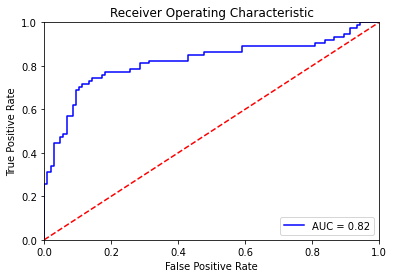

In [198]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
preds2 = svm_proba[:,1]
#print(preds2)
fpr, tpr, threshold = metrics.roc_curve(y_test, preds2)
#print(fpr,tpr,threshold)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()